In [1]:
import cmasher as cmr
import janitor
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(
    context="notebook", font_scale=1.5, style="whitegrid", palette="gray"
)  #  Darkgrid Whitegrid Dark White Ticks

In [2]:
import pandas as pd
df_stars = (
    pd.read_csv("../input/repo_stars_timeseries.csv")
    .assign(date=lambda df: pd.to_datetime(df["date"]))
)
df_stars

,fileslug,date,stars,treated,boughtstars,treated2,_merge
0,0riion_py-sls-lambda-toolkit,2023-05-09,0,1,1,2,both
1,0riion_py-sls-lambda-toolkit,2023-05-10,0,1,1,2,both
2,0riion_py-sls-lambda-toolkit,2023-05-11,0,1,1,2,both
3,0riion_py-sls-lambda-toolkit,2023-05-12,0,1,1,2,both
4,0riion_py-sls-lambda-toolkit,2023-05-13,25,1,1,2,both
...,...,...,...,...,...,...,...
13387,zjupgx_diverge,2023-05-27,0,0,0,0,left_only
13388,zjupgx_diverge,2023-05-28,0,0,0,0,left_only
13389,zjupgx_diverge,2023-05-29,0,0,0,0,left_only
13390,zjupgx_diverge,2023-05-30,0,0,0,0,left_only


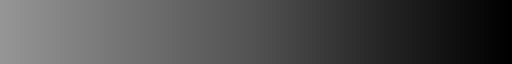

In [3]:
cmr.get_sub_cmap("Greys", 0.5, 1)

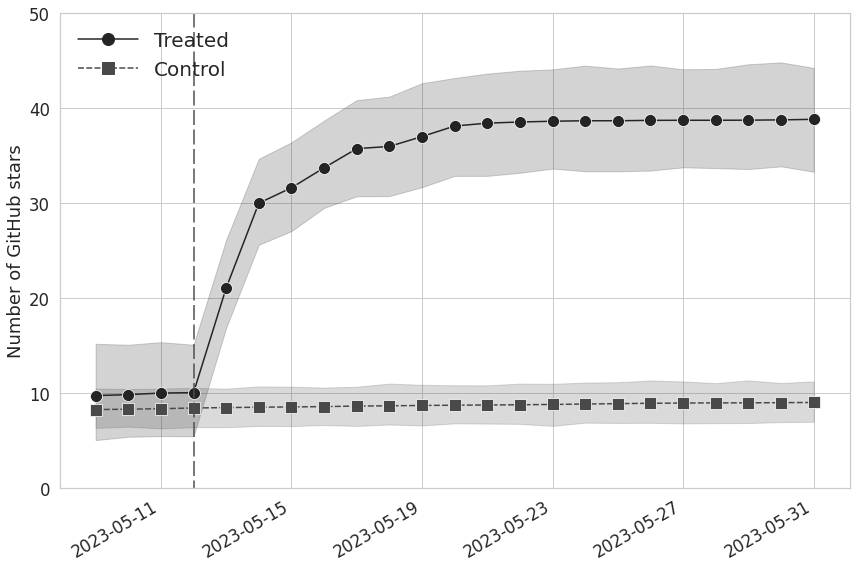

In [4]:
_, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(
    data=df_stars,
    x="date",
    y="stars",
    markersize=12,
    hue="treated",
    style="treated",
    hue_order=[1, 0],
    style_order=[1, 0],
    markers=["o", "s"],
    #     err_style="bars",
    ax=ax,
)

# Set the locator and formatter for the x-axis
myFmt = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)

# Specify the desired number of x-axis tickers
ax.xaxis.set_major_locator(plt.MaxNLocator(7))

plt.xticks(rotation=30, ha="right")

# Add a vertical line to annotate a time period
annotate_date = pd.to_datetime("2023-05-12")  # Specify the date to annotate
plt.axvline(x=annotate_date, color=".3", linestyle=(5, (10, 3)))

# # Annotate a text on the plot
# annotate_date = pd.to_datetime('2023-05-15')  # Specify the date to annotate
# annotate_text = 'Annotated Text'  # Specify the text to annotate
# plt.annotate(annotate_text, xy=(annotate_date, 30), xytext=(10, 10),
#              textcoords='offset points', arrowprops=dict(arrowstyle='->'))

ax.set_yticks(range(0, 60, 10))

ax.set_ylabel("Number of GitHub stars")
ax.set_xlabel("")

# Legend
# get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# specify order of items in legend
order = [0, 1]
labels = ["Treated", "Control"]
ax.legend(
    labels=[labels[idx] for idx in order],
    handles=[handles[idx] for idx in order],
    title="",
    loc="upper left",
    fontsize=20,
    markerscale=2,
    markerfirst=True,
    frameon=False,
    handlelength=3,
)

plt.tight_layout()

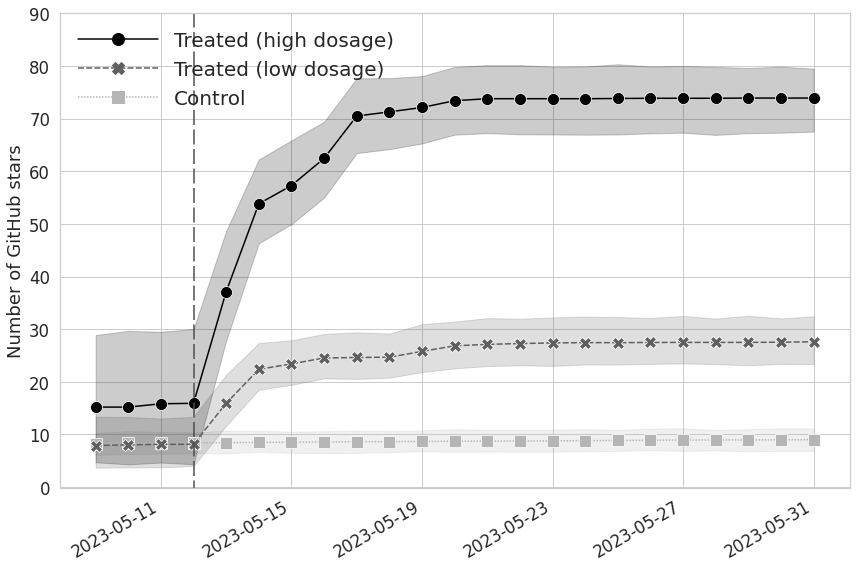

In [5]:
_, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(
    data=df_stars,
    x="date",
    y="stars",
    markersize=12,
    hue="treated2",
    style="treated2",
    hue_order=[2, 1, 0],
    style_order=[2, 1, 0],
    markers=["o", "X", "s"],
    palette=cmr.get_sub_cmap("Greys", 0.4, 1),
    #     err_style="bars",
    ax=ax,
)

# Set the locator and formatter for the x-axis
myFmt = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(myFmt)

# Specify the desired number of x-axis tickers
ax.xaxis.set_major_locator(plt.MaxNLocator(7))

plt.xticks(rotation=30, ha="right")

# Add a vertical line to annotate a time period
annotate_date = pd.to_datetime("2023-05-12")  # Specify the date to annotate
plt.axvline(x=annotate_date, color=".3", linestyle=(5, (10, 3)))

# # Annotate a text on the plot
# annotate_date = pd.to_datetime('2023-05-15')  # Specify the date to annotate
# annotate_text = 'Annotated Text'  # Specify the text to annotate
# plt.annotate(annotate_text, xy=(annotate_date, 30), xytext=(10, 10),
#              textcoords='offset points', arrowprops=dict(arrowstyle='->'))

ax.set_yticks(range(0, 100, 10))

ax.set_ylabel("Number of GitHub stars")
ax.set_xlabel("")

# Legend
# get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# specify order of items in legend
order = [2, 1, 0]

# add legend to plot
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

labels = ["Control", "Treated (low dosage)", "Treated (high dosage)"]
ax.legend(
    labels=[labels[idx] for idx in order],
    handles=[handles[idx] for idx in order],
    title="",
    loc="upper left",
    fontsize=20,
    markerscale=2,
    markerfirst=True,
    frameon=False,
    handlelength=4,
)

plt.tight_layout()